# [Rice Image Classification]

### Proyek Pengembangan Machine Learning: Image Classification Model Deployment
by Fajar Tirtayasa


Source Dataset: https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset

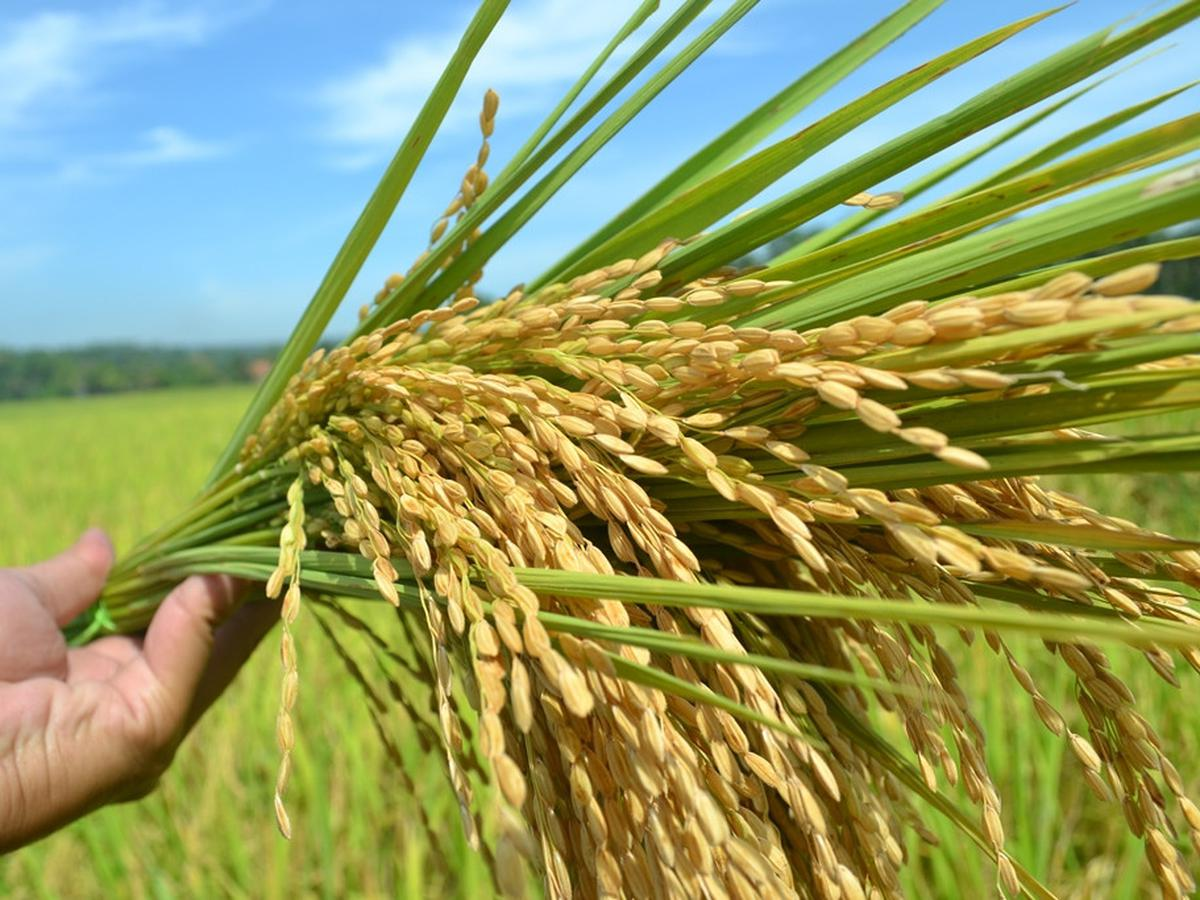

#### Load Dataset from Kaggle

In [1]:
!pip install opendatasets

  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=c17914727626a1811cf7da7a7e9922f0d9aab8ce81e22c5507f077e71979aa39
  Stored in directory: c:\users\fajar\appdata\local\pip\cache\wheels\ac\b2\c3\fa4706d469b5879105991d1c8be9a3c2ef329ba9fe2ce5085e
Successfully built kaggle


In [2]:
import opendatasets as od

od.download("https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: fajartirtayasa
Your Kaggle Key: ········


100%|████████████████████████████████████████████████████████████████████████████████| 219M/219M [05:48<00:00, 659kB/s]


#### Preprocessing Data

In [3]:
!pip install split_folders

In [4]:
import splitfolders
splitfolders.ratio("/Data Science/Dicoding - Belajar Pengembangan Machine Learning/Rice Image Classification/rice-image-dataset",
                  output="/Data Science/Dicoding - Belajar Pengembangan Machine Learning/Rice Image Classification/data_splitted",
                  seed=32, ratio=(.8,.2))

Copying files: 75000 files [02:04, 604.60 files/s]


In [12]:
train_dir = "/Data Science/Dicoding - Belajar Pengembangan Machine Learning/Rice Image Classification/data_splitted/train"
validation_dir = "/Data Science/Dicoding - Belajar Pengembangan Machine Learning/Rice Image Classification/data_splitted/val"

In [13]:
import os
print(os.listdir(train_dir)) #checking data training folder
print(os.listdir(validation_dir)) #checking data validation folder

['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']


In [14]:
#checking number of data train
train_dir_arborio = "/Data Science/Dicoding - Belajar Pengembangan Machine Learning/Rice Image Classification/data_splitted/train/Arborio"
train_dir_basmati = "/Data Science/Dicoding - Belajar Pengembangan Machine Learning/Rice Image Classification/data_splitted/train/Basmati"
train_dir_ipsala = "/Data Science/Dicoding - Belajar Pengembangan Machine Learning/Rice Image Classification/data_splitted/train/Ipsala"
train_dir_jasmine = "/Data Science/Dicoding - Belajar Pengembangan Machine Learning/Rice Image Classification/data_splitted/train/Jasmine"
train_dir_karacadag = "/Data Science/Dicoding - Belajar Pengembangan Machine Learning/Rice Image Classification/data_splitted/train/Karacadag"

list_train_dir_arborio = os.listdir(train_dir_arborio)
list_train_dir_basmati = os.listdir(train_dir_basmati)
list_train_dir_ipsala = os.listdir(train_dir_ipsala)
list_train_dir_jasmine = os.listdir(train_dir_jasmine)
list_train_dir_karacadag = os.listdir(train_dir_karacadag)

number_of_data_train = (len(list_train_dir_arborio) +
                        len(list_train_dir_basmati) +
                        len(list_train_dir_ipsala) +
                        len(list_train_dir_jasmine) +
                        len(list_train_dir_karacadag))

print("The number of data train is {} sampels.".format(number_of_data_train))

The number of data train is 60000 sampels.


In [15]:
#checking number of data validation
val_dir_arborio = "/Data Science/Dicoding - Belajar Pengembangan Machine Learning/Rice Image Classification/data_splitted/val/Arborio"
val_dir_basmati = "/Data Science/Dicoding - Belajar Pengembangan Machine Learning/Rice Image Classification/data_splitted/val/Basmati"
val_dir_ipsala = "/Data Science/Dicoding - Belajar Pengembangan Machine Learning/Rice Image Classification/data_splitted/val/Ipsala"
val_dir_jasmine = "/Data Science/Dicoding - Belajar Pengembangan Machine Learning/Rice Image Classification/data_splitted/val/Jasmine"
val_dir_karacadag = "/Data Science/Dicoding - Belajar Pengembangan Machine Learning/Rice Image Classification/data_splitted/val/Karacadag"

list_val_dir_arborio = os.listdir(val_dir_arborio)
list_val_dir_basmati = os.listdir(val_dir_basmati)
list_val_dir_ipsala = os.listdir(val_dir_ipsala)
list_val_dir_jasmine = os.listdir(val_dir_jasmine)
list_val_dir_karacadag = os.listdir(val_dir_karacadag)

number_of_data_validation = (len(list_val_dir_arborio) +
                             len(list_val_dir_basmati) +
                             len(list_val_dir_ipsala) +
                             len(list_val_dir_jasmine) +
                             len(list_val_dir_karacadag))

print("The number of data validation is {} sampels.".format(number_of_data_validation))

The number of data validation is 15000 sampels.


In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#implementing image augmentation
train_datagenerator = ImageDataGenerator(
    rescale=1./255,
    shear_range=.2,
    zoom_range=.2,
    rotation_range=20,
    horizontal_flip=True,
    fill_mode="nearest"
)

validation_datagenerator = ImageDataGenerator(rescale=1./255)

In [18]:
train_generator = train_datagenerator.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode="categorical"
)

validation_generator = validation_datagenerator.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode="categorical"
)

Found 60000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.


#### Modelling

In [19]:
#building Sequential model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 64)      

In [21]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss="categorical_crossentropy",
              metrics=["accuracy"]
)

In [22]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get("accuracy") > .92):
            print("\nAkurasi telah melampaui 92%")
            self.model.stop_training = True
callbacks = myCallback()

In [23]:
result = model.fit(train_generator,
                   epochs=10,
                   validation_data=validation_generator,
                   verbose=2,
                   callbacks=[callbacks]
                   )

Epoch 1/10
1875/1875 - 630s - loss: 0.2308 - accuracy: 0.9097 - val_loss: 0.0423 - val_accuracy: 0.9865 - 630s/epoch - 336ms/step
Epoch 2/10

Akurasi telah melampaui 92%
1875/1875 - 582s - loss: 0.0550 - accuracy: 0.9815 - val_loss: 0.0741 - val_accuracy: 0.9745 - 582s/epoch - 310ms/step


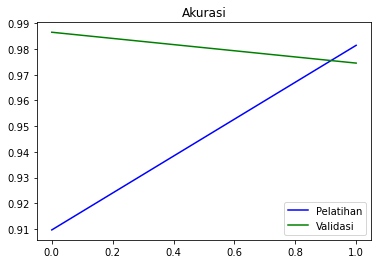

<Figure size 432x288 with 0 Axes>

In [25]:
import matplotlib.pyplot as plt

accuracy = result.history["accuracy"]
validation_accuracy = result.history["val_accuracy"]

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="Pelatihan")
plt.plot(epochs, validation_accuracy, "g", label="Validasi")
plt.title("Akurasi")
plt.legend(loc=0)
plt.figure()

plt.show()

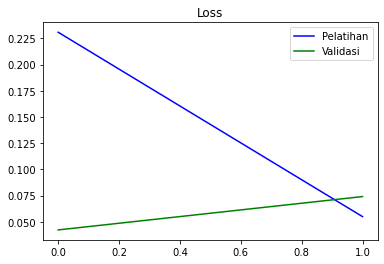

<Figure size 432x288 with 0 Axes>

In [26]:
loss = result.history["loss"]
validation_loss = result.history["val_loss"]

epochs = range(len(loss))

plt.plot(epochs, loss, "b", label="Pelatihan")
plt.plot(epochs, validation_loss, "g", label="Validasi")
plt.title("Loss")
plt.legend(loc=0)
plt.figure()

plt.show()

#### Save Model to TFLite Format

In [28]:
export_dir = "/Data Science/Dicoding - Belajar Pengembangan Machine Learning/Rice Image Classification/model"
tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: /Data Science/Dicoding - Belajar Pengembangan Machine Learning/Rice Image Classification/model\assets


INFO:tensorflow:Assets written to: /Data Science/Dicoding - Belajar Pengembangan Machine Learning/Rice Image Classification/model\assets


In [30]:
import pathlib

converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

tflite_model_file = pathlib.Path("RiceClassification.tflite")
tflite_model_file.write_bytes(tflite_model)

4835048